In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import japanize_matplotlib
import seaborn as sns

import librosa
import librosa.display


In [2]:
JSON_DIR = "../data/01_raw/3_dataset_mono"
EXP_DIR = "../data/03_report/3_dataset"
Path(EXP_DIR).mkdir(exist_ok=True, parents=True)

In [3]:
json_paths = list(Path(JSON_DIR).glob("*.json"))
json_paths = [str(p) for p in json_paths]
json_paths.sort()
json_paths

['../data/01_raw/3_dataset_mono/10_rain_tap_umbrella.mono.json',
 '../data/01_raw/3_dataset_mono/11_raindrops_tap_ground(asphalt).mono.json',
 '../data/01_raw/3_dataset_mono/12_river_into_hand.mono.json',
 '../data/01_raw/3_dataset_mono/13_river_stone_throw.mono.json',
 '../data/01_raw/3_dataset_mono/14_shinkansen.mono.json',
 '../data/01_raw/3_dataset_mono/15_tokyocity_bakurocho.mono.json',
 '../data/01_raw/3_dataset_mono/16_tokyostation.mono.json',
 '../data/01_raw/3_dataset_mono/1_marunoko.mono.json',
 '../data/01_raw/3_dataset_mono/2_keitrack_80kmh.mono.json',
 '../data/01_raw/3_dataset_mono/3_keitrack_100kmh.mono.json',
 '../data/01_raw/3_dataset_mono/4_keitrack_0kmh.mono.json',
 '../data/01_raw/3_dataset_mono/5_ambientmusic1.mono.json',
 '../data/01_raw/3_dataset_mono/6_ambientmusic2.mono.json',
 '../data/01_raw/3_dataset_mono/7_ambientmusic3.mono.json',
 '../data/01_raw/3_dataset_mono/8_cicada_carpark.mono.json',
 '../data/01_raw/3_dataset_mono/9_rain_lot.mono.json']

In [4]:
import json
def load_f_json(json_path):
    with open(json_path, mode='rt', encoding='utf-8') as fp:
        data = json.load(fp)
    return data

load_f_json(json_paths[0])

{'wav_path': '../data/01_raw/3_dataset_mono/10_rain_tap_umbrella.mono.wav',
 'loudness': 5.929063292904696,
 'sharpness': 1.3673580484110626,
 'roughness': 0.5468350488959769}

In [5]:
buf = []
for json_path in json_paths:
    data = load_f_json(json_path)
    buf.append(data)


In [6]:
df_data = pd.DataFrame(buf)

df_data["wav_name"] = df_data["wav_path"].apply(lambda x: Path(x).stem.split(".")[0])

df_data.to_csv(Path(EXP_DIR) / "df_data.csv", index=None)

del df_data

In [7]:
df_data = pd.read_csv(Path(EXP_DIR) / "df_data.csv")
df_data

,wav_path,loudness,sharpness,roughness,wav_name
0,../data/01_raw/3_dataset_mono/10_rain_tap_umbr...,5.929063,1.367358,0.546835,10_rain_tap_umbrella
1,../data/01_raw/3_dataset_mono/11_raindrops_tap...,3.907903,2.359040,0.534402,11_raindrops_tap_ground(asphalt)
2,../data/01_raw/3_dataset_mono/12_river_into_ha...,2.754799,1.710264,0.015031,12_river_into_hand
3,../data/01_raw/3_dataset_mono/13_river_stone_t...,2.641144,1.667700,0.100109,13_river_stone_throw
4,../data/01_raw/3_dataset_mono/14_shinkansen.mo...,7.718985,0.564459,0.058151,14_shinkansen
5,../data/01_raw/3_dataset_mono/15_tokyocity_bak...,16.238379,1.175398,0.044781,15_tokyocity_bakurocho
6,../data/01_raw/3_dataset_mono/16_tokyostation....,18.282246,1.436602,0.170194,16_tokyostation
7,../data/01_raw/3_dataset_mono/1_marunoko.mono.wav,4.548069,2.636095,0.031414,1_marunoko
8,../data/01_raw/3_dataset_mono/2_keitrack_80kmh...,3.976177,0.559338,0.018120,2_keitrack_80kmh
9,../data/01_raw/3_dataset_mono/3_keitrack_100km...,6.165468,0.636120,0.025063,3_keitrack_100kmh


In [8]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]
Nc = len(sorted_names)
print(Nc)
# sorted_names

156


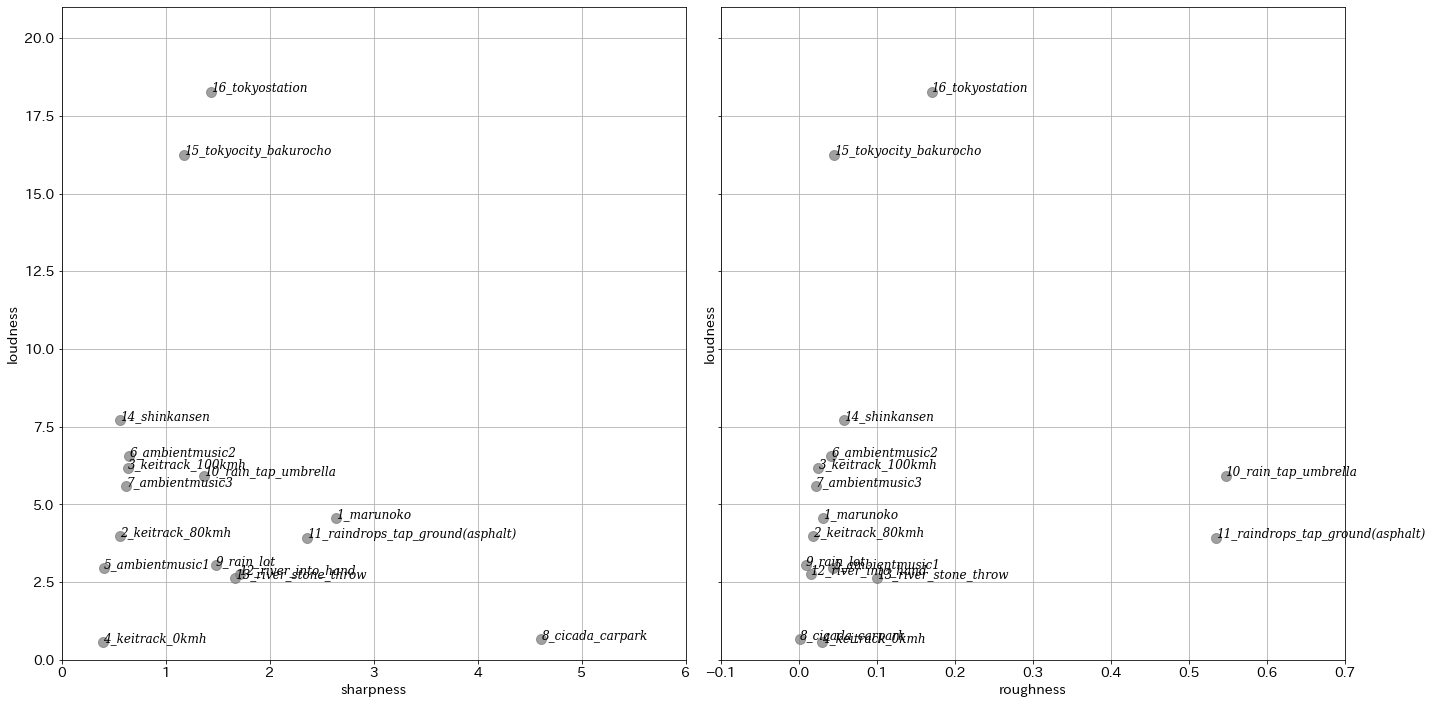

In [12]:
colorlist = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']


y_feature = "loudness"
x_features = ["sharpness", "roughness"]

plt.rcParams["font.size"] = 14

dfp = df_data.copy()

fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
axs = ax.flatten()

for ax_no in [0, 1]:
    
    plt.sca(axs[ax_no])
    
    for i, df1 in dfp.iterrows():

        wav_name = df1["wav_name"]
        x_feature= x_features[ax_no]
        x = df1[x_feature]
        y = df1[y_feature]
#         c = colorlist[i]
        c = "gray"
        
        plt.plot(x, y , "o", markersize=10, color=c, label=wav_name, alpha=0.75)
        plt.text(x, y, wav_name, color="#000000",
                                 fontfamily="serif",
                                 #fontweight="bold",
                                 fontstyle="italic",
                                 fontsize=12)

    axs[0].set_xlim([0, 6])
    axs[0].set_ylim([0, 21])
    axs[1].set_xlim([-0.1, 0.7])
    plt.tight_layout()
    #plt.legend()
    plt.ylabel(y_feature)
    plt.xlabel(x_feature)
    plt.grid()
    


plt.savefig(Path(EXP_DIR) / f"Loudness vs Sharpnes-Roghness.jpg")



